In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
data=pd.read_csv('C:/Users/Nishi/Desktop/excelR/assignments/Logistic Regression/bank-full (1).csv')

In [4]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
print(data.shape)

(45211, 17)


In [8]:
data.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
print(list(data.columns))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


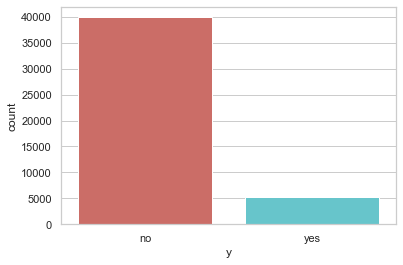

In [13]:
#bar plot for dependent variable
sns.countplot(x='y',data=data, palette='hls')
plt.show()

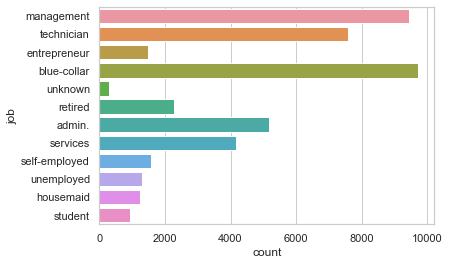

In [15]:
sns.countplot(y="job", data=data)
plt.show()

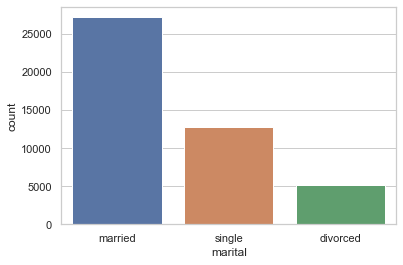

In [16]:
sns.countplot(x="marital", data=data)
plt.show()

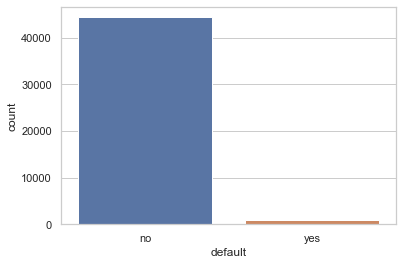

In [17]:
sns.countplot(x="default", data=data)
plt.show()

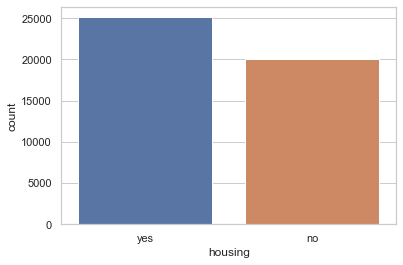

In [18]:
sns.countplot(x="housing", data=data)
plt.show()

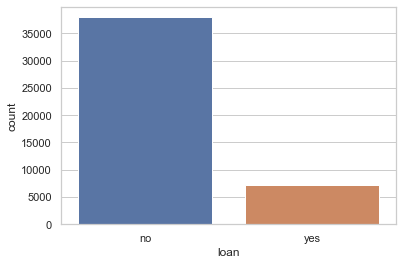

In [19]:
sns.countplot(x="loan", data=data)
plt.show()

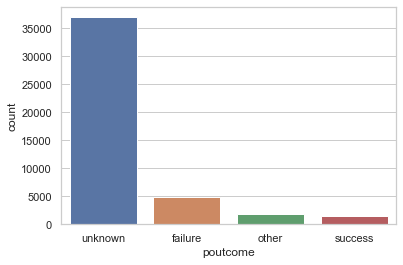

In [20]:
sns.countplot(x="poutcome", data=data)
plt.show()

In [21]:
data.drop(data.columns[[0, 3,5, 8, 9, 10, 11, 12, 13, 14]], axis=1, inplace=True)

In [22]:
data

,job,marital,default,housing,loan,poutcome,y
0,management,married,no,yes,no,unknown,no
1,technician,single,no,yes,no,unknown,no
2,entrepreneur,married,no,yes,yes,unknown,no
3,blue-collar,married,no,yes,no,unknown,no
4,unknown,single,no,no,no,unknown,no
...,...,...,...,...,...,...,...
45206,technician,married,no,no,no,unknown,yes
45207,retired,divorced,no,no,no,unknown,yes
45208,retired,married,no,no,no,success,yes
45209,blue-collar,married,no,no,no,unknown,no


In [32]:
data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])
data2


,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,no,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,no,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
2,no,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,no,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
4,no,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,yes,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
45207,yes,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,0,0,1
45208,yes,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
45209,no,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1


In [33]:
X = data2.iloc[:,1:]
Y = data2.iloc[:,0]


In [34]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X,Y)

LogisticRegression(random_state=0)

In [36]:
y_pred = classifier.predict(X)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, y_pred)
print(confusion_matrix)

[[39488   434]
 [ 4404   885]]
